
# **Geometric Operations and Other Mathematical Tools**

**Objectives**

In the first part of the lab, you will apply geometric transformations to an image. This allows you to perform different operations like reshape translation, i.e. to shift, reshape and rotate the image. In the second part of the lab, you will learn how to apply some basic array and matrix operations to the image.

**Geometric Operations**

* Scaling
* Translation
* Rotation

**Mathematical Operations**

* Array Operations
* Matix Operations n

In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png -O barbara.png

--2024-12-03 10:45:43--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lenna.png’

lenna.png           100%[===================>] 462.73K  2.90MB/s    in 0.2s    

2024-12-03 10:45:44 (2.90 MB/s) - ‘lenna.png’ saved [473831/473831]

--2024-12-03 10:45:44--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-cours

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [ ]:
def plot_image(image_1, image_2,title_1="Orignal",title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

# **Geometric Transformations**
Geometric transformations allow you to perform different operations like translation, i.e. to shift, reshape and rotate the image.

We can resize an image using the method resize() of PIL images, which takes the resized image's width and height as paramters.

Consider the following image:

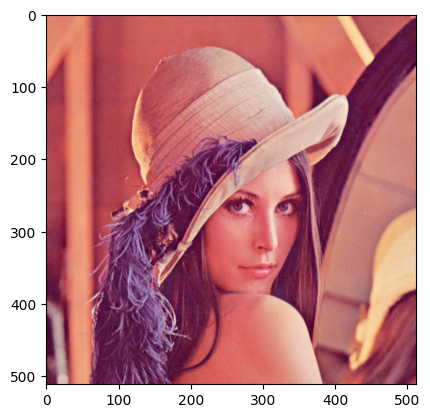

In [ ]:
image = Image.open("lenna.png")
plt.imshow(image)
plt.show()

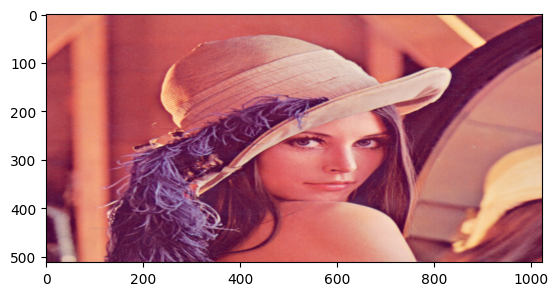

In [ ]:
# We can scale the horizontal axis by two and leave the vertical axis as is:

width, height = image.size
new_width = 2 * width
new_hight = height
new_image = image.resize((new_width, new_hight))
plt.imshow(new_image)
plt.show()

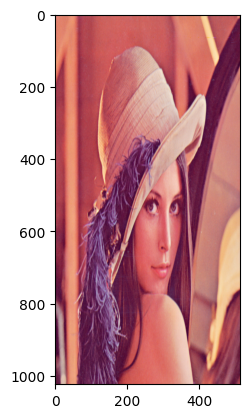

In [ ]:
# In the same manner, we can scale the vertical axis by two:

new_width = width
new_hight = 2 * height
new_image = image.resize((new_width, new_hight))
plt.imshow(new_image)
plt.show()

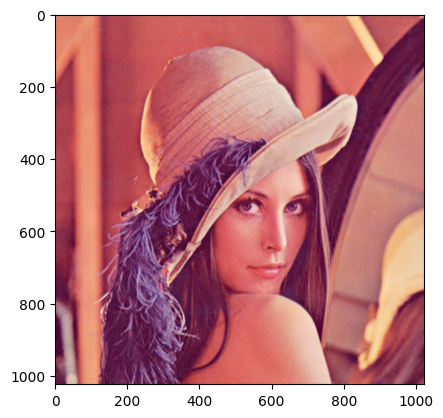

In [ ]:
# We can double both the width and the height of the image:

new_width = 2 * width
new_hight = 2 * height
new_image = image.resize((new_width, new_hight))
plt.imshow(new_image)
plt.show()

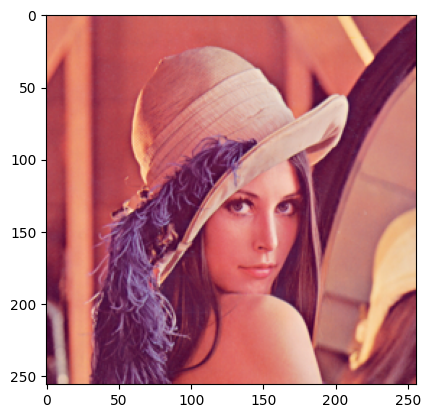

In [ ]:
# We can also shrink the image's width and height both by 1/2:

new_width = width // 2
new_hight = height // 2

new_image = image.resize((new_width, new_hight))
plt.imshow(new_image)
plt.show()

# Rotation

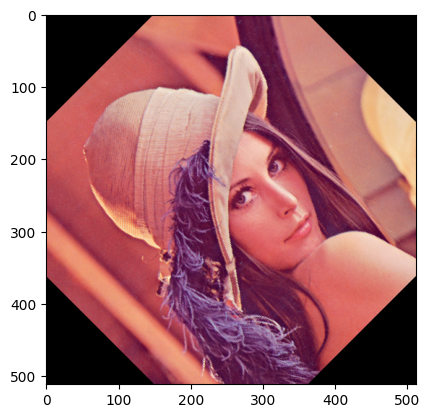

In [ ]:

# We can rotate an image by angle  𝜃
#  , using the method rotate.

# We can rotate our toy image by 45 degrees:

theta = 45
new_image = image.rotate(theta)
plt.imshow(new_image)
plt.show()

# Mathematical Operations
## Array Operations
We can perform array operations on an image; Using Python broadcasting, we can add a constant to each pixel's intensity value.

Before doing that, we must first we convert the PIL image to a numpy array.

In [ ]:
image = np.array(image)

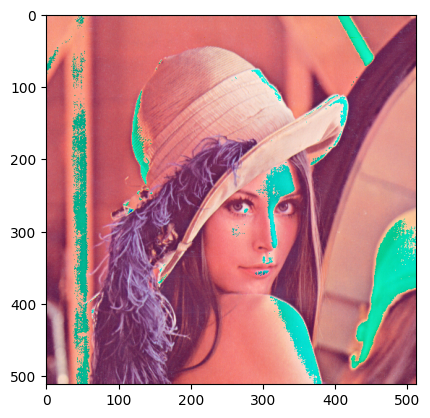

In [ ]:
# We can then add the constant to the image array:

new_image = image + 20
plt.imshow(new_image)
plt.show()

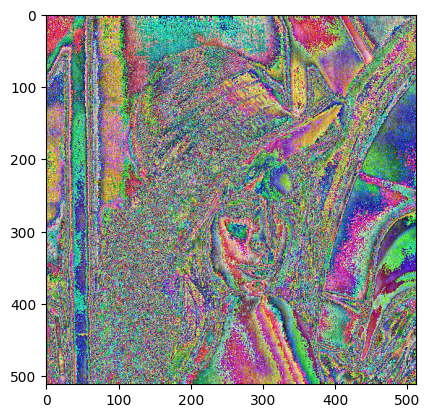

In [ ]:
# We can also multiply every pixel's intensity value by a constant value.

new_image = 10 * image
plt.imshow(new_image)
plt.show()

In [ ]:
# We can add the elements of two arrays of equal shape.
# In this example, we generate an array of random noises with the same shape and data type as our image.

Noise = np.random.normal(0, 20, (height, width, 3)).astype(np.uint8)
Noise.shape

(512, 512, 3)

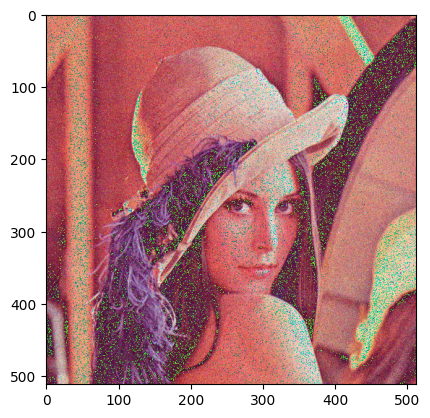

In [ ]:
# We add the generated noise to the image
# and plot the result. We see the values that have corrupted the image:

new_image = image + Noise
plt.imshow(new_image)
plt.show()

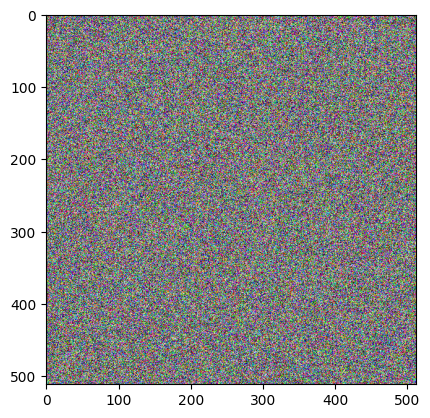

In [ ]:
# At the same time, we can multiply the elements of two arrays of equal shape.
#  We can multiply the random image and the Lenna image and plot the result.

new_image = image*Noise
plt.imshow(new_image)
plt.show()

# Matrix Operations

In [ ]:
# Grayscale images are matrices. Consider the following grayscale image:

im_gray = Image.open("barbara.png")

In [ ]:
# Even though the image is gray, it has three channels; we can convert it to a one-channel image.

from PIL import ImageOps
im_gray = ImageOps.grayscale(im_gray)

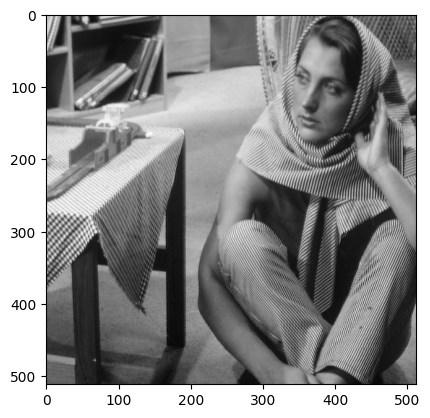

In [ ]:
# We can convert the PIL image to a numpy array:

im_gray = np.array(im_gray )
plt.imshow(im_gray,cmap='gray')
plt.show()

In [ ]:
# We can apply algorithms designed for matrices.
#  We can use Singular Value Decomposition, decomposing our image matrix into a product of three matrices.

U, s, V = np.linalg.svd(im_gray , full_matrices=True)

In [ ]:
# We see s is not rectangular:

s.shape

(512,)

In [ ]:
# We can convert s to a diagonal matrix S:

S = np.zeros((im_gray.shape[0], im_gray.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)

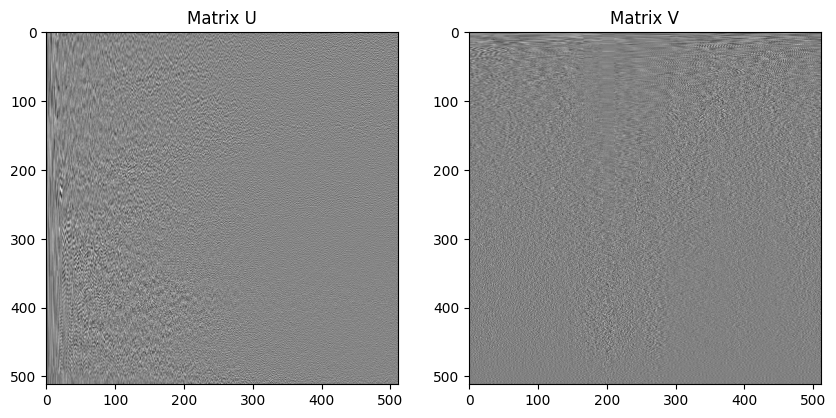

In [ ]:
# We can plot the matrix U and V:

plot_image(U, V, title_1="Matrix U", title_2="Matrix V")

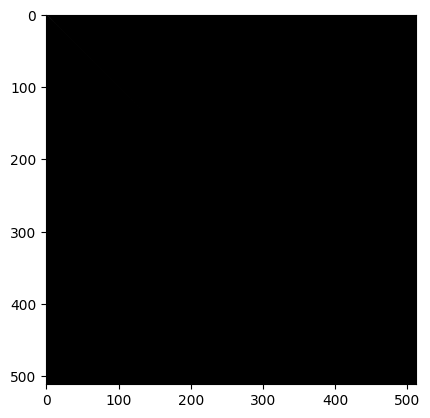

In [ ]:
# We see most of the elements in S are zero:

plt.imshow(S, cmap='gray')
plt.show()

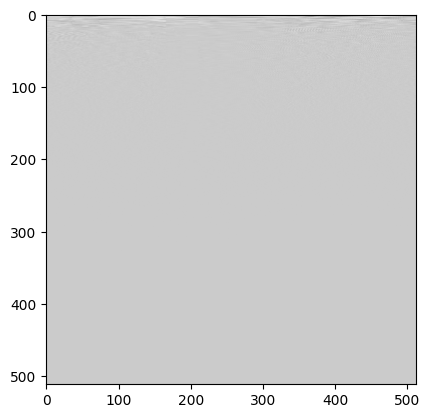

In [ ]:
# We can find the matrix product of all the matrices. First, we can perform matrix multiplication on S and U and assign it to B and plot the results:

B = S.dot(V)
plt.imshow(B,cmap='gray')
plt.show()